# Process Continuous Data (SILIVRI)

In [1]:
import os
import obspy
from continuous_data_processor import ContinuousDataPreprocessor

In [2]:
afad_catalog_path = "/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/processed_catalogs/afad_catalog.csv"
kandilli_catalog_path = '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/processed_catalogs/kandilli_catalog.csv'

waveforms_dir = "/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day"

In [3]:
station_dirs = []
for (root, dirs, files) in os.walk(waveforms_dir):
    for dir in dirs:
        station_dirs.append(os.path.join(waveforms_dir,dir)) 
station_dirs

['/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ADVT',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/CTKS',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ERIK',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/TKR',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/IZI',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/SLVT',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/UKOP',
 '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_

In [4]:
for station in station_dirs:
    print(station.split('/')[-1])
    for (root, dirs, files) in os.walk(station):
        print(len(files))
        print('--------------------------------')

ADVT
273
--------------------------------
CTKS
273
--------------------------------
ERIK
273
--------------------------------
TKR
273
--------------------------------
IZI
273
--------------------------------
SLVT
243
--------------------------------
UKOP
273
--------------------------------
BGKT
273
--------------------------------
MRMT
273
--------------------------------
ISK
270
--------------------------------
KRBG
273
--------------------------------
KLYT
273
--------------------------------
YLV
273
--------------------------------
KCTX
102
--------------------------------
ARMT
264
--------------------------------
ORLT
273
--------------------------------
OSMT
273
--------------------------------
LAP
204
--------------------------------
KAVV
231
--------------------------------
GONE
273
--------------------------------
CRLT
162
--------------------------------
GELI
273
--------------------------------
HRTX
273
--------------------------------
RKY
162
-------------------------------

## Initialize Preprocessor

## Process Only One Station

In [5]:
station_dirs[0]

'/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ADVT'

In [6]:
preprocessor = ContinuousDataPreprocessor(
    catalog_csv=kandilli_catalog_path,
    output_hdf5_path="output/ADVT_continuous_waveforms.hdf5",
    output_metadata_csv_path="output/ADVT_continuous_metadata.csv",
    window_length=60, 
    sampling_rate=100
)

In [7]:
preprocessor.process_station(station_dirs[0])

Processed 127021 windows from station ADVT


In [8]:
import h5py
import numpy as np

hdf5_path = "output/ADVT_continuous_waveforms.hdf5"

with h5py.File(hdf5_path, 'r') as f:
    print(f"HDF5 file: {hdf5_path}\n")
    
    print("File structure:")
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)
    
    print(f"\n{'='*50}\n")
    
    if 'data' in f:
        data_group = f['data']
        traces = list(data_group.keys())
        print(f"Number of traces: {len(traces)}")
        
        if traces:
            print(f"\nFirst 5 trace names:")
            for trace in traces[:5]:
                print(f"  - {trace}")
            
            first_trace = traces[0]
            print(f"\nInspecting first trace: {first_trace}")
            trace_data = data_group[first_trace][:]
            print(f"  Shape: {trace_data.shape}")
            print(f"  Dtype: {trace_data.dtype}")
            print(f"  Min value: {np.min(trace_data)}")
            print(f"  Max value: {np.max(trace_data)}")
            print(f"  Has NaN: {np.any(np.isnan(trace_data))}")
    else:
        print("No 'data' group found!")

HDF5 file: output/ADVT_continuous_waveforms.hdf5

File structure:
data
data/KO.ADVT.20190831_235959
data/KO.ADVT.20190901_000059
data/KO.ADVT.20190901_000159
data/KO.ADVT.20190901_000259
data/KO.ADVT.20190901_000359
data/KO.ADVT.20190901_000459
data/KO.ADVT.20190901_000559
data/KO.ADVT.20190901_000659
data/KO.ADVT.20190901_000759
data/KO.ADVT.20190901_000859
data/KO.ADVT.20190901_000959
data/KO.ADVT.20190901_001059
data/KO.ADVT.20190901_001159
data/KO.ADVT.20190901_001259
data/KO.ADVT.20190901_001359
data/KO.ADVT.20190901_001459
data/KO.ADVT.20190901_001559
data/KO.ADVT.20190901_001659
data/KO.ADVT.20190901_001759
data/KO.ADVT.20190901_001859
data/KO.ADVT.20190901_001959
data/KO.ADVT.20190901_002059
data/KO.ADVT.20190901_002159
data/KO.ADVT.20190901_002259
data/KO.ADVT.20190901_002359
data/KO.ADVT.20190901_002459
data/KO.ADVT.20190901_002559
data/KO.ADVT.20190901_002659
data/KO.ADVT.20190901_002759
data/KO.ADVT.20190901_002859
data/KO.ADVT.20190901_002959
data/KO.ADVT.20190901_003059
d

In [9]:
import pandas as pd 
metadata_df = pd.read_csv('output/ADVT_continuous_metadata.csv')
metadata_df

trace_name station_name network  \
0       KO.ADVT.20190831_235959         ADVT      KO   
1       KO.ADVT.20190901_000059         ADVT      KO   
2       KO.ADVT.20190901_000159         ADVT      KO   
3       KO.ADVT.20190901_000259         ADVT      KO   
4       KO.ADVT.20190901_000359         ADVT      KO   
...                         ...          ...     ...   
127016  KO.ADVT.20191130_235459         ADVT      KO   
127017  KO.ADVT.20191130_235559         ADVT      KO   
127018  KO.ADVT.20191130_235659         ADVT      KO   
127019  KO.ADVT.20191130_235759         ADVT      KO   
127020  KO.ADVT.20191130_235859         ADVT      KO   

                  trace_start_time label  p_arrival_sample  s_arrival_sample  \
0       2019-08-31T23:59:59.410000    no               NaN               NaN   
1       2019-09-01T00:00:59.410000    no               NaN               NaN   
2       2019-09-01T00:01:59.410000    no               NaN               NaN   
3       2019-09-01T00:02:59.410000    no               NaN               NaN   
4       2019-09-01T00:03:59.410000    no               NaN               NaN   
...                            ...   ...               ...               ...   
127016  2019-11-30T23:54:59.410000    no               NaN               NaN   
127017  2019-11-30T23:55:59.410000    no               NaN               NaN   
127018  2019-11-30T23:56:59.410000    no               NaN               NaN   
127019  2019-11-30T23:57:59.410000    no               NaN               NaN   
127020  2019-11-30T23:58:59.410000    no               NaN               NaN   

                      source_id trace_category  
0       KO.ADVT.20190831_235959          noise  
1       KO.ADVT.20190901_000059          noise  
2       KO.ADVT.20190901_000159          noise  
3       KO.ADVT.20190901_000259          noise  
4       KO.ADVT.20190901_000359          noise  
...                         ...            ...  
127016  KO.ADVT.20191130_235459          noise  
127017  KO.ADVT.20191130_235559          noise  
127018  KO.ADVT.20191130_235659          noise  
127019  KO.ADVT.20191130_235759          noise  
127020  KO.ADVT.20191130_235859          noise  

[127021 rows x 9 columns]

In [10]:
metadata_df['label'].unique()

array(['no', 'eq'], dtype=object)

In [11]:
metadata_df['label'].value_counts()

label
no    126678
eq       343
Name: count, dtype: int64

# Check Catalog

In [ ]:
afad_catalog_df= pd.read_csv(afad_catalog_path)
afad_catalog_df

orgtime station              p_arrival_time  \
0      2019-08-31T21:07:15    GCAM  2019-08-31T21:07:23.670000   
1      2019-08-31T21:07:15    DDIM  2019-08-31T21:07:23.970000   
2      2019-08-31T21:07:15     DGB  2019-08-31T21:07:25.660000   
3      2019-08-31T21:07:15    ZEYE  2019-08-31T21:07:29.740000   
4      2019-08-31T21:07:15    BDRM  2019-08-31T21:07:29.760000   
...                    ...     ...                         ...   
68128  2019-12-31T20:15:50    ADCV  2019-12-31T20:15:59.950000   
68129  2019-12-31T20:15:50    TVAN  2019-12-31T20:16:00.150000   
68130  2019-12-31T20:15:50    BLIS  2019-12-31T20:16:01.850000   
68131  2019-12-31T20:15:50    DORK  2019-12-31T20:16:09.540000   
68132  2019-12-31T20:15:50    MUSM  2019-12-31T20:16:11.440000   

                   s_arrival_time  event_lat  event_lon  event_dep  
0                             NaN     37.559     26.785        6.9  
1                             NaN     37.559     26.785        6.9  
2                             NaN     37.559     26.785        6.9  
3                             NaN     37.559     26.785        6.9  
4                             NaN     37.559     26.785        6.9  
...                           ...        ...        ...        ...  
68128  2019-12-31T20:16:06.750000     38.340     42.805        6.9  
68129  2019-12-31T20:16:07.850000     38.340     42.805        6.9  
68130  2019-12-31T20:16:09.340000     38.340     42.805        6.9  
68131  2019-12-31T20:16:23.330000     38.340     42.805        6.9  
68132  2019-12-31T20:16:25.930000     38.340     42.805        6.9  

[68133 rows x 7 columns]

In [ ]:
afad_catalog_df[afad_catalog_df['station']=='ADVT']

Empty DataFrame
Columns: [orgtime, station, p_arrival_time, s_arrival_time, event_lat, event_lon, event_dep]
Index: []

### Kandilli Catalog

In [28]:
kandilli_catalog_path = '/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/processed_catalogs/kandilli_catalog.csv'
kandilli_df = pd.read_csv(kandilli_catalog_path)

In [29]:
kandilli_df

orgtime station              p_arrival_time  \
0      2019-09-01T01:14:47.100000    APMY  2019-09-01T01:14:55.900000   
1      2019-09-01T01:14:47.100000    AYDB  2019-09-01T01:15:13.300000   
2      2019-09-01T01:14:47.100000    BASM  2019-09-01T01:14:54.100000   
3      2019-09-01T01:14:47.100000    CAME  2019-09-01T01:15:05.900000   
4      2019-09-01T01:14:47.100000    GORD  2019-09-01T01:15:15.800000   
...                           ...     ...                         ...   
75570  2019-12-31T23:23:19.800000    AGRB  2019-12-31T23:23:49.100000   
75571  2019-12-31T23:23:19.800000    AKDM  2019-12-31T23:23:27.500000   
75572  2019-12-31T23:23:19.800000    CUKT  2019-12-31T23:23:37.200000   
75573  2019-12-31T23:23:19.800000    GURO  2019-12-31T23:23:38.400000   
75574  2019-12-31T23:23:19.800000    MLAZ  2019-12-31T23:23:43.700000   

                   s_arrival_time  event_lat  event_lon  event_dep  
0      2019-09-01T01:15:03.300000    37.8495    29.6362     9000.0  
1                             NaN    37.8495    29.6362     9000.0  
2                             NaN    37.8495    29.6362     9000.0  
3      2019-09-01T01:15:19.600000    37.8495    29.6362     9000.0  
4                             NaN    37.8495    29.6362     9000.0  
...                           ...        ...        ...        ...  
75570                         NaN    37.9537    42.9645    10900.0  
75571  2019-12-31T23:23:33.500000    37.9537    42.9645    10900.0  
75572  2019-12-31T23:23:49.500000    37.9537    42.9645    10900.0  
75573  2019-12-31T23:23:52.100000    37.9537    42.9645    10900.0  
75574  2019-12-31T23:24:00.700000    37.9537    42.9645    10900.0  

[75575 rows x 7 columns]

In [30]:
kandilli_df[kandilli_df['station']=='ADVT']

orgtime station              p_arrival_time  \
12     2019-09-01T01:22:38.100000    ADVT  2019-09-01T01:22:50.900000   
766    2019-09-02T19:38:08.900000    ADVT  2019-09-02T19:38:23.100000   
1100   2019-09-03T12:13:41.100000    ADVT  2019-09-03T12:14:30.500000   
1158   2019-09-03T13:03:19.900000    ADVT  2019-09-03T13:03:30.100000   
1835   2019-09-05T15:50:31.200000    ADVT  2019-09-05T15:50:41.900000   
...                           ...     ...                         ...   
72691  2019-12-26T08:53:46.400000    ADVT  2019-12-26T08:54:02.500000   
73109  2019-12-27T07:35:44.400000    ADVT  2019-12-27T07:36:09.500000   
73798  2019-12-28T07:32:32.800000    ADVT  2019-12-28T07:32:49.700000   
73972  2019-12-28T23:12:16.100000    ADVT  2019-12-28T23:12:44.200000   
74393  2019-12-29T23:50:33.200000    ADVT  2019-12-29T23:50:57.700000   

                   s_arrival_time  event_lat  event_lon  event_dep  
12                            NaN    40.5463    30.5667     7100.0  
766    2019-09-02T19:38:33.400000    40.5545    30.6573    10500.0  
1100                          NaN    38.7213    26.5463     9500.0  
1158                          NaN    40.7480    30.2428    10300.0  
1835   2019-09-05T15:50:50.300000    40.5252    30.4382        0.0  
...                           ...        ...        ...        ...  
72691                         NaN    39.6275    29.5022        0.0  
73109                         NaN    39.5210    28.5472     5800.0  
73798                         NaN    39.9272    28.8333        0.0  
73972                         NaN    39.5542    28.0295    12900.0  
74393                         NaN    39.1802    29.4388     9400.0  

[415 rows x 7 columns]

## Process All Stations

In [ ]:
for station_dir in station_dirs:
    print(f"Processing station: {station_dir}")
    preprocessor.process_station(station_dir)

print("All stations processed!")

# Example Station MSEED 

In [18]:
advt_st = obspy.read("/home/boxx/Public/earthquake_model_evaluations/data/SilivriPaper_2019-09-01__2019-11-30/prepared_waveforms/day_by_day/ADVT/*.mseed")

In [19]:
advt_st

351770 Trace(s) in Stream:

KO.ADVT..HHE | 2019-08-31T23:59:58.860000Z - 2019-09-01T00:03:08.990000Z | 100.0 Hz, 19014 samples
...
(351768 other traces)
...
KO.ADVT..HHZ | 2019-11-30T23:43:28.000000Z - 2019-12-01T00:00:04.290000Z | 100.0 Hz, 99630 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [20]:
advt_st.merge()

3 Trace(s) in Stream:
KO.ADVT..HHE | 2019-08-31T23:59:58.860000Z - 2019-12-01T00:00:00.990000Z | 100.0 Hz, 786240214 samples (masked)
KO.ADVT..HHN | 2019-08-31T23:59:57.120000Z - 2019-12-01T00:00:00.240000Z | 100.0 Hz, 786240313 samples (masked)
KO.ADVT..HHZ | 2019-08-31T23:59:59.410000Z - 2019-12-01T00:00:04.290000Z | 100.0 Hz, 786240489 samples (masked)

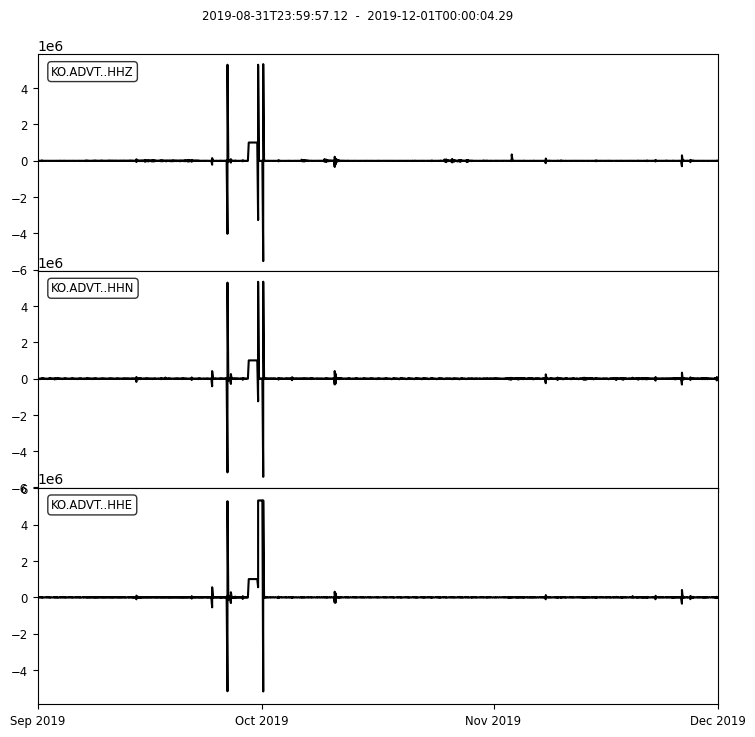

In [24]:
advt_st.plot();